### **Football Trade EDA using Python**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['top250-00-19.csv']


# **Read in Data**

In [2]:
# Store data in df
df = pd.read_csv("../input/top250-00-19.csv")

# **Simple Exploration of Data**

In [3]:
# Look at first five rows of data
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [4]:
# Look at how many rows and columns the data have
df.shape

(4700, 10)

In [5]:
# Basic statistics about the data and its variables
df.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


# **EDA (Explatoratory Data Analysis)**

EDA is important because it allows us to better understand the data before modelling (although there is no specific modelling involved for this data... but of course, predicting the "transfer fee" of a player can be one potentially interesting project). Also, we can preliminary insights about the data through EDA  even before using anything fancy like Machine Learning or Deep Learning for modelling!

In [6]:
plt.style.use('ggplot')

In [7]:
plt.rcParams['figure.figsize'] = (9, 9)

## Distribution of variables

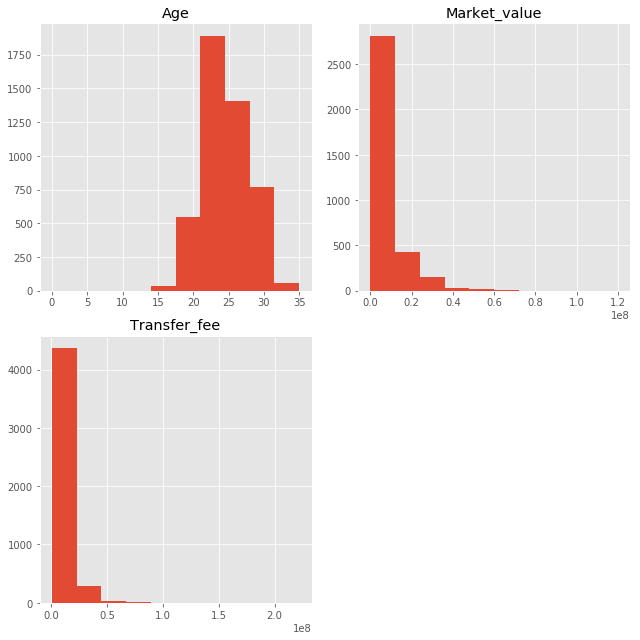

In [8]:
# Histogram
df.hist()
plt.tight_layout()

Age seems to be pretty normally distributed but market_value and transfer_fee seem very skeweed to the right with very little players traded at very high prices. This is fair becuase we only have "few" star players who are traded for exorbitant prices

## Which "position" has been traded the most?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

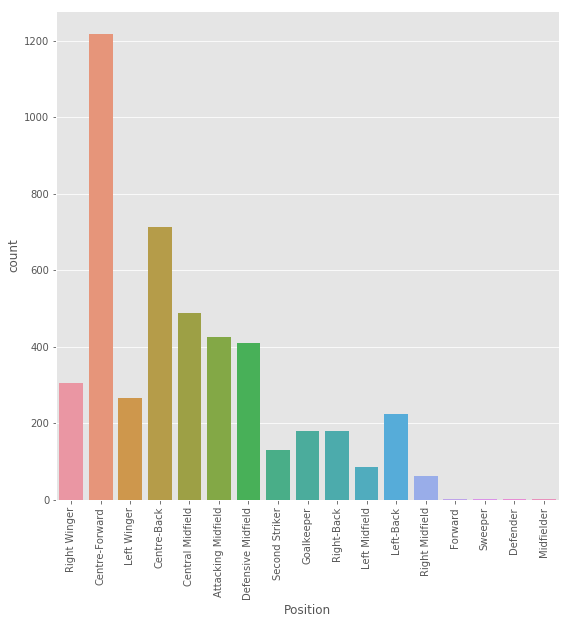

In [9]:
sns.countplot(x='Position',data=df)
plt.xticks(rotation=90)

Center Foward(CF) traded the most followed by Center Back and multiple midfielder positions. The **Center positions** are traded the most!

## Which Season was football trade the most active?

Text(0,0.5,'Number of Trade')

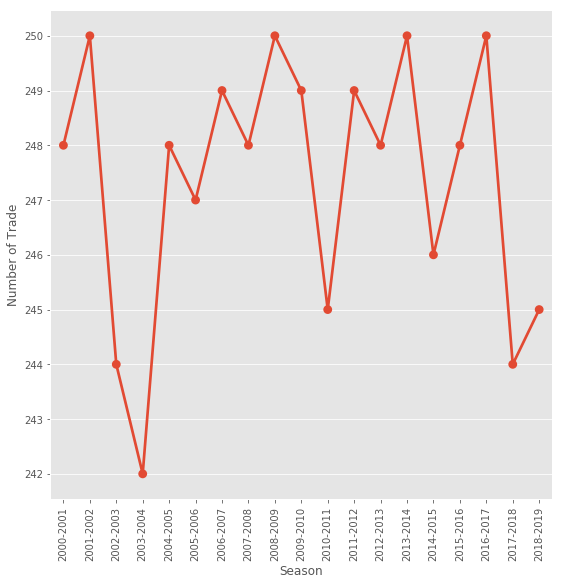

In [10]:
sns.pointplot(x='index',y='Season',data=pd.DataFrame(df.Season.value_counts()).reset_index().sort_values('index'))
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Number of Trade')

Multiple seasons had the most number of trade (e.g. 2013-2014, 2016-2017) and the number of trades doesn't seem to display any kind of seasonal trend over time!

## Which league spent the most money buying players for every season? & Which league sold the most players in terms of average transfer fees?

Groupby is a very useful operation for finding answers to these kinds of questions! Groupby allows us to perform calculations on every group!

In [11]:
# Order by mean transfer fee from highest to lowest
df.groupby(['League_to']).Transfer_fee.describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
League_to,,,,,,,,
LaLiga,525.0,1.272450e+07,1.463579e+07,950000.0,5000000.0,8000000.0,15000000.0,125000000.0
Premier League,1256.0,1.170016e+07,1.141499e+07,950000.0,4500000.0,8200000.0,14025000.0,105000000.0
Segunda División - Segunda Fase,1.0,1.100000e+07,NaN,11000000.0,11000000.0,11000000.0,11000000.0,11000000.0
Serie A,739.0,1.019651e+07,9.301671e+06,900000.0,4870000.0,7500000.0,12000000.0,117000000.0
Super League,122.0,9.756393e+06,1.007859e+07,1200000.0,4350000.0,7075000.0,10810000.0,60000000.0
League One,5.0,9.700000e+06,1.766352e+06,7000000.0,9200000.0,9800000.0,11000000.0,11500000.0
Russia,7.0,9.528571e+06,5.185465e+06,5000000.0,5850000.0,8000000.0,11500000.0,19000000.0
Ligue 1,397.0,9.276373e+06,1.497652e+07,1000000.0,3900000.0,6000000.0,10000000.0,222000000.0
1.Bundesliga,422.0,8.529964e+06,7.039637e+06,825000.0,4000000.0,6500000.0,10000000.0,43000000.0


The league that spent the most money, on average, to buy players for the past 13 years or so was Spanish LaLiga and British Premiere League. One unexpected league that was ranked 5th place was the Super League of Greece which is less known to global soccer fans. But it has definitely spent a lot of money bringing expensive players to the league!

In [12]:
# Order by mean transfer fee from highest to lowest
df.groupby('League_from').Transfer_fee.describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
League_from,,,,,,,,
Rel. Ligue 1,2.0,1.600000e+07,5.656854e+06,12000000.0,14000000.0,16000000.0,18000000.0,20000000.0
LaLiga,418.0,1.323890e+07,1.598130e+07,1400000.0,5000000.0,8200000.0,16000000.0,222000000.0
Liga NOS,178.0,1.253753e+07,1.072555e+07,1000000.0,4000000.0,8300000.0,19750000.0,45000000.0
Premier League,608.0,1.192189e+07,1.337834e+07,1000000.0,4500000.0,7775000.0,14000000.0,125000000.0
Serie A,602.0,1.176741e+07,1.142490e+07,1100000.0,5000000.0,8000000.0,14000000.0,105000000.0
1.Bundesliga,265.0,1.155834e+07,1.231038e+07,1000000.0,4700000.0,8000000.0,13000000.0,115000000.0
Ligue 1,428.0,1.027311e+07,1.125766e+07,1000000.0,4875000.0,7500000.0,11225000.0,135000000.0
Canada,1.0,1.000000e+07,NaN,10000000.0,10000000.0,10000000.0,10000000.0,10000000.0
Premier Liga,169.0,9.912249e+06,9.436450e+06,1500000.0,4200000.0,6000000.0,12000000.0,59000000.0


Leagues that sold players the most in terms of average transfer fee are not that different from the previous list of leagues which spent the most money on average to buy players. But Ligue1, the top division of French men's soccer league, is topping the list. However, we can see there were only two trades that happened (as we can see from the "count" column with the number 2) but the average of those two trades were significant enough to make Ligue1 rank 1st for this list. Let's look at which two players from Ligue1 were sold to other teams

In [13]:
# Two players from Ligue1 sold to other teams
df[df.League_from == 'Rel. Ligue 1']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4014,Didier Ndong,Central Midfield,22,FC Lorient,Rel. Ligue 1,Sunderland,Premier League,2016-2017,5000000.0,20000000
4080,Raphaël Guerreiro,Left-Back,22,FC Lorient,Rel. Ligue 1,Bor. Dortmund,1.Bundesliga,2016-2017,9000000.0,12000000


## Which Teams spent the most money (total sum) in buying players for the past 13 years?

In [14]:
# Top10 Teams that spend the most money in terms of total amount in buying players for the past 13 years
df.groupby("Team_to").Transfer_fee.sum().sort_values(ascending=False).head(10)

Team_to
Chelsea         1820650000
Man City        1800520000
Real Madrid     1680650000
FC Barcelona    1673040000
Man Utd         1497360000
Juventus        1470940000
Liverpool       1412420000
Paris SG        1274780000
Inter           1202690000
Spurs           1024400000
Name: Transfer_fee, dtype: int64

Big teams in premeire league, La Liga, Serie A and Ligue1 spent the most money in buying star players!

## Comparison of players sold from Premeire League, La Liga and Serie A

In [15]:
df_from_top3_league = df[df.League_from.isin(['Serie A','Premier League','LaLiga'])]

We can use "Parallel Coordinates" to compare players sold from the three leagues!

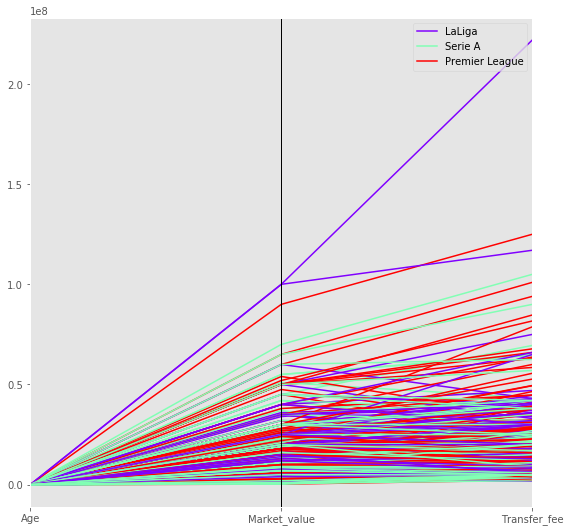

In [16]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df_from_top3_league.drop(['Name','Position','Team_from',
                             'Team_to','League_to','Season'], axis=1), 'League_from',colormap='rainbow')

- We can observe the three outliers (the three strands of data whose transfer fee are way higher than the market value and also way up in the graph compared to the cluster of strands below) let's look at which players they are
- Most strands seem to be clustered around at the bottom with the green(Serie A) and orange(Premier League) having been valued at slightly higher market value and transferred for higher fees than LaLiga players

In [17]:
df_from_top3_league.sort_values('Transfer_fee',ascending=False).head(3)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000


Those three outlier players were the big shots! Christiano Ronaldo, Coutinho and Neymar lol

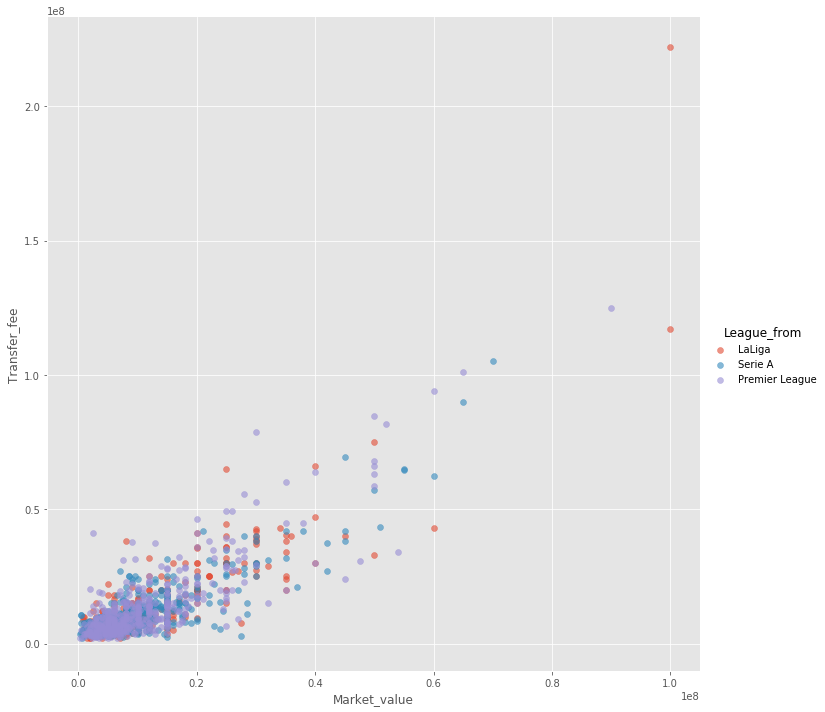

In [18]:
sns.FacetGrid(df_from_top3_league, hue="League_from", height=10).\
map(plt.scatter, "Market_value", "Transfer_fee",alpha=0.6).add_legend()

We can also fit a linear regression line on each of the league cluster!

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


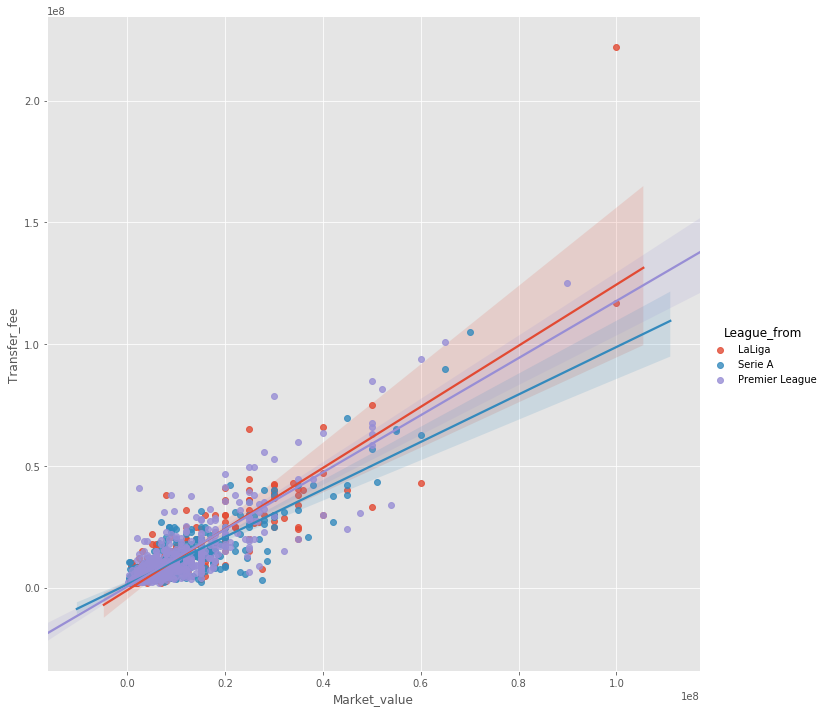

In [19]:
sns.lmplot("Market_value", "Transfer_fee", data=df_from_top3_league, hue='League_from',height=10)

- Players sold from Premier League have less variability compared to the other two leagues. Majority of the points are clustered at the lower hand left corner grid, so the transfer
- The slopes of the linear regression lines are steepest in the order of LaLiga, Premier League and Serie A. This shows us that for one increment of market value of a player, it is more expensive to purchase a player from LaLiga than Premier League

## Correlation amongst variables

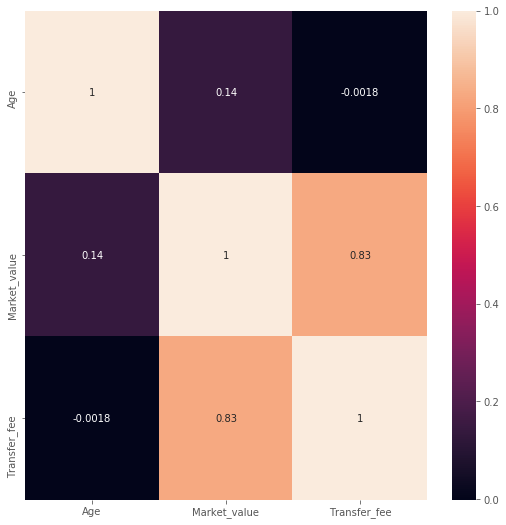

In [20]:
# Correlation Heatmap
sns.heatmap(df.corr(),annot=True)

- Correlation between market value and transfer fee is very high. This means the more expensive the player is evaluated in the market, the more likely it is going to be sold at a expensive price.
- The correlation value betwen age and transfer free is negative although the strenght of the correlation isn't that strong. This at least suggests that the older the age, the less value it has in the market. Of course, I expect the returns to age is a reversed bell shaped curve because as a player gets older, he gets more experience and hence becomes more valuable as a player. But after a certain threshold, the player is considered to be old and is valued lowly in the market.

### **Please consider upvoting if you liked the post :)**